Primero carga y visualiza los datos. (flights.csv)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import
flights = pd.read_csv("flights.csv", sep= ",")

El banco de datos contiene observaciones de los vuelos nacionales estadounidenses en 2013 y consta de los siguientes campos:
- **Año**: El año del vuelo (todos los registros son de 2013).
- **Mes**: El mes del vuelo
- **DayofMonth** (día del mes): El día del mes en el que salió el vuelo
- **Día de la semana**: El día de la semana en que salió el vuelo - del 1 (lunes) al 7 (domingo)
- **Compañía aérea**: La abreviatura de dos letras de la compañía aérea.
- **OriginAirportID**: Identificador numérico único del aeropuerto de salida.
- **OriginAirportName**: El nombre completo del aeropuerto de salida
- **OriginCity** (Ciudad de origen): Ciudad del aeropuerto de salida
- **OriginState**: Estado del aeropuerto de salida Estado del aeropuerto de salida
- **DestAirportID**: Identificador numérico único del aeropuerto de destino
- **DestAirportName**: El nombre completo del aeropuerto de destino
- **DestCity**: La ciudad del aeropuerto de destino
- **DestState**: El estado del aeropuerto de destino
- **CRSDepTime**: La hora de salida programada
- **DepDelay**: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
- **DelDelay15**: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde")
- **CRSArrTime**: La hora de llegada programada
- **ArrDelay**: El número de minutos que se retrasó la lleg

Lo que se tiene que hacer en esta práctica es explorar los datos de vuelo para analizar los posibles factores que afectan a los retrasos en la salida o llegada de un vuelo.

 1. Empieza con limpiar los datos.
     - Identifica los datos nulos o ausentes e imputa los valores de sustitución adecuados.
     - Identifica y elimina cualquier valor atípico en las columnas *DepDelay* y *ArrDelay*.
             - Tips:
            - Primero visualiza la distribución de las columnas
            - Define donde se observan los valores atipicos
            - Recorta los datos de tal forma que los percentiles esten entre 1 y 90
 2. Explora los datos limpios.
     - Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
     - Determina la distribución de las columnas *DepDelay* y *ArrDelay*.
     - Utiliza estadísticas, funciones de agregación y visualización para responder a las siguientes preguntas:
         - *¿Cuáles son los promedios (mean) de salida y llegada?*
         - *¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?*
         - *¿Hay días de la semana más propensos a las llegadas que otros?*
         - *¿Cuál es el aeropuerto de salida con mayor retraso medio?*
         - *¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?*
         - *¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?*
         - *¿Qué ruta tiene el mayor retraso medio de llegada?*

In [ ]:
#escribe tu código aqui
flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [ ]:
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [ ]:
flights.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [ ]:
flights.ffill()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


In [ ]:
#Para ver los histogramas
#fig, an = plt.subplots()
#an.hist(flights['CRSDepTime'])
##CORTAR antes de 500 APROXIMADAMENTE

In [ ]:
#fig, an = plt.subplots()
#an.hist(flights['CRSArrTime'])
#CORTAR antes de 500 APROXIMADAMENTE

(array([2.59635e+05, 1.11740e+04, 9.78000e+02, 1.01000e+02, 2.40000e+01,
        1.50000e+01, 4.00000e+00, 1.00000e+00, 3.00000e+00, 5.00000e+00]),
 array([ -75. ,   76.5,  228. ,  379.5,  531. ,  682.5,  834. ,  985.5,
        1137. , 1288.5, 1440. ]),
 <BarContainer object of 10 artists>)

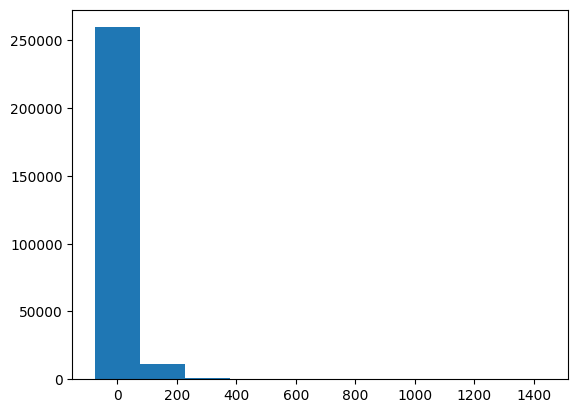

In [ ]:
fig, an = plt.subplots()
an.hist(flights['ArrDelay'])
#CORTAR EN 200 APROXIMADAMENTE

(array([2.61701e+05, 9.23100e+03, 8.59000e+02, 9.70000e+01, 2.30000e+01,
        1.50000e+01, 5.00000e+00, 1.00000e+00, 2.00000e+00, 6.00000e+00]),
 array([ -63. ,   85.8,  234.6,  383.4,  532.2,  681. ,  829.8,  978.6,
        1127.4, 1276.2, 1425. ]),
 <BarContainer object of 10 artists>)

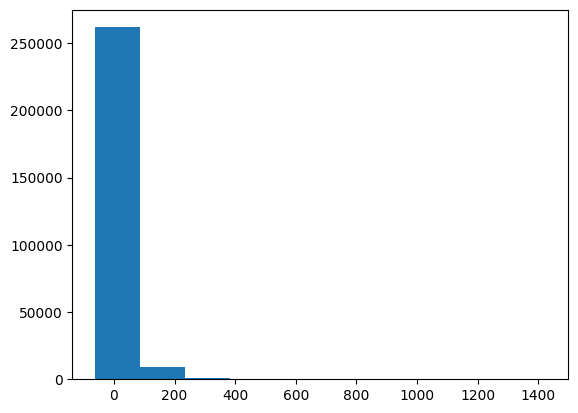

In [ ]:
fig, an = plt.subplots()
an.hist(flights['DepDelay'])
#CORTAR EN 200 APROXIMADAMENTE

In [ ]:
#fig, an = plt.subplots()
#an.hist(flights['DepDel15'])

In [ ]:
flights['DepDel15'] = flights['DepDel15'].ffill()
flights.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

(array([2.61701e+05, 9.23100e+03, 8.59000e+02, 9.70000e+01, 2.30000e+01,
        1.50000e+01, 5.00000e+00, 1.00000e+00, 2.00000e+00, 6.00000e+00]),
 array([ -63. ,   85.8,  234.6,  383.4,  532.2,  681. ,  829.8,  978.6,
        1127.4, 1276.2, 1425. ]),
 <BarContainer object of 10 artists>)

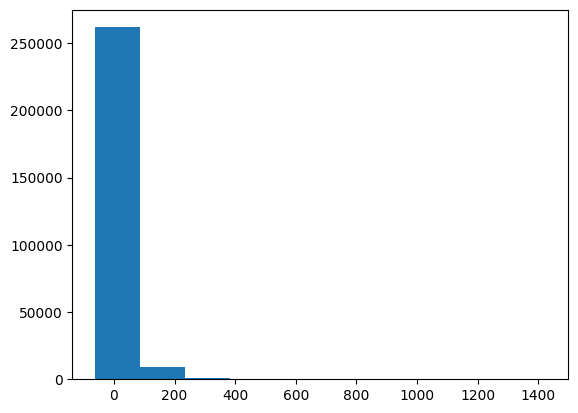

In [ ]:
fig, an = plt.subplots()
an.hist(flights['DepDelay'])

(array([2.59635e+05, 1.11740e+04, 9.78000e+02, 1.01000e+02, 2.40000e+01,
        1.50000e+01, 4.00000e+00, 1.00000e+00, 3.00000e+00, 5.00000e+00]),
 array([ -75. ,   76.5,  228. ,  379.5,  531. ,  682.5,  834. ,  985.5,
        1137. , 1288.5, 1440. ]),
 <BarContainer object of 10 artists>)

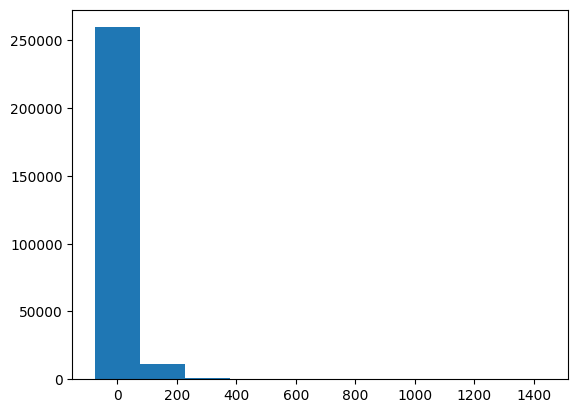

In [ ]:
fig, an = plt.subplots()
an.hist(flights['ArrDelay'])

In [ ]:
#fig, an = plt.subplots()
#an.hist(flights['DepDel15'])

In [ ]:
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Creamos una figura de 2 subgraficas (2 filas, 1 columna)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Trazar el histograma
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frecuencia')

    # Añadir líneas para la media, la mediana y la moda
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Valor')

    # Agregar titulo a la figura
    fig.suptitle('Distribucion de los datos')

    # Show the figure
    fig.show()

#  Obtener la variable a examinar
#col = df_students['Calificacion']
# llamar la función


In [ ]:
DepDelay=flights['DepDelay']
ArrDelay=flights['ArrDelay']

# - **¿Cuáles son los promedios (mean) de salida y llegada?**
El promedio de llegada ArrDelay (minutos de retraso de llegada) es de -5.68 mintos y el de DepDelay es de -0.13 minutos (salida anticipada del vuelo por valor negativo)


Minimum:-11.00
Mean:-0.13
Median:-2.00
Mode:-3.00
Maximum:36.00

Minimum:-32.00
Mean:-5.68
Median:-6.00
Mode:0.00
Maximum:16.00



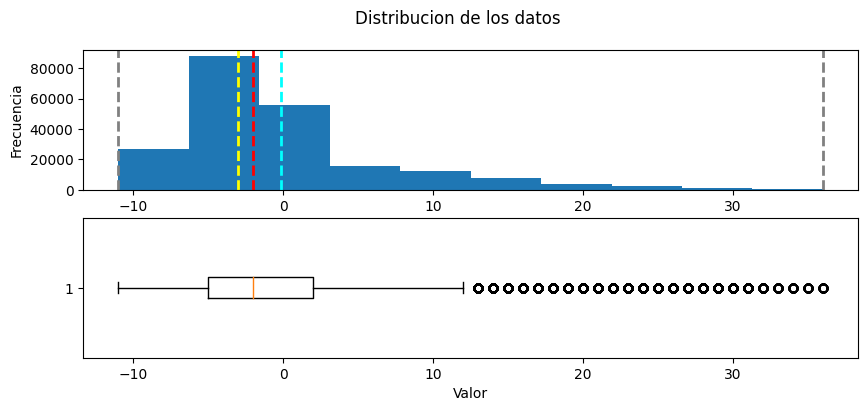

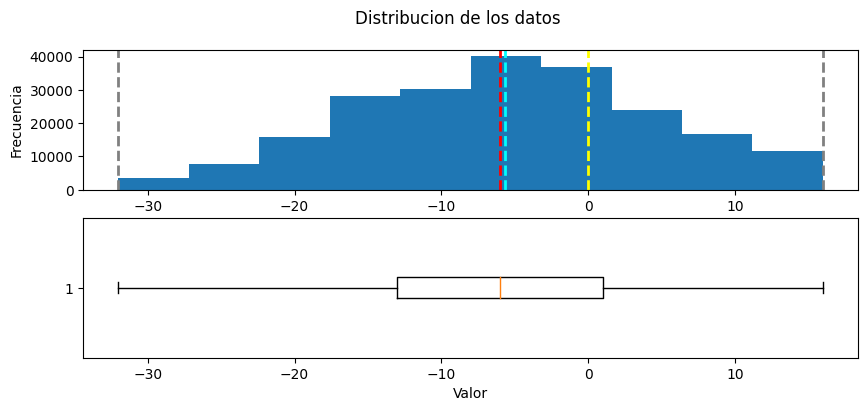

In [ ]:
quartiles_depdelay_01=flights.DepDelay.quantile(0.01)
quartiles_depdelay_90=flights.DepDelay.quantile(0.90)

flights=flights[flights.DepDelay < quartiles_depdelay_90]
flights=flights[flights.DepDelay > quartiles_depdelay_01]



quartiles_arrdelay_01=flights.ArrDelay.quantile(0.01)
quartiles_arrdelay_90=flights.ArrDelay.quantile(0.90)
flights=flights[flights.ArrDelay < quartiles_arrdelay_90]
flights=flights[flights.ArrDelay > quartiles_arrdelay_01]

#DepDelay=flights['DepDelay']
#ArrDelay=flights['ArrDelay']

show_distribution(flights['DepDelay'])

show_distribution(flights['ArrDelay'])


#ArrDelay=flights['ArrDelay']

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



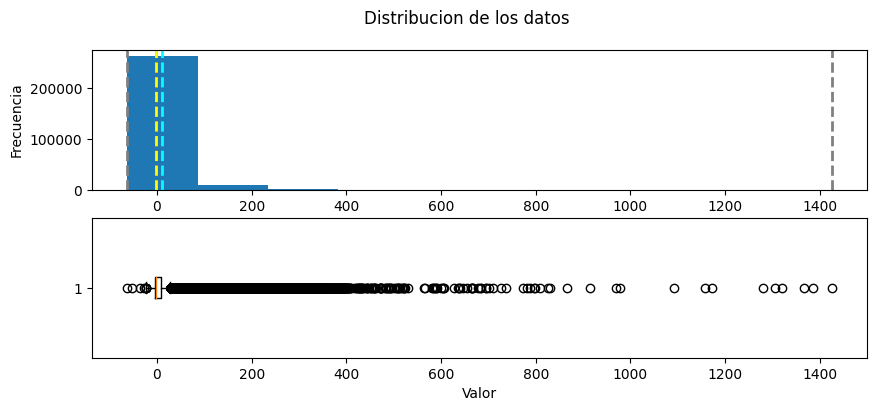

In [ ]:
show_distribution(DepDelay)

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



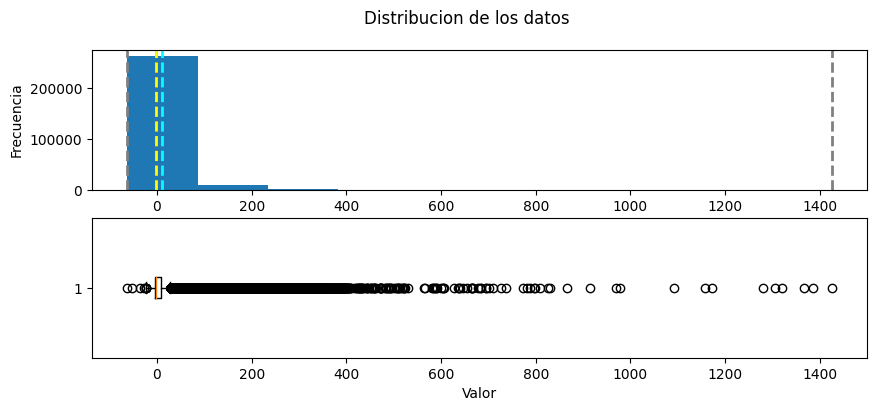

In [ ]:
show_distribution(DepDelay)


In [ ]:
print(flights['DepDelay'])

0          4
2         -3
4         -1
6         -1
7          4
          ..
271932    -2
271933    -6
271934    -7
271937    30
271938    -5
Name: DepDelay, Length: 214500, dtype: int64


In [ ]:
#DepDelay_filtrado = DepDelay < 200
#DepDelay_filtrado = flights['DepDelay'] >=200
#DepDelay_filtrado = flights.query('DepDelay >= 300')
#DepDelay_filtrado = DepDelay.where(DepDelay <=300)
#DepDelay_filtrado = DepDelay.where(DepDelay <=50 and DepDelay >=-50)
"""
condicion1=flights.DepDelay <=50
condicion2=flights.DepDelay >= -10
DepDelay_filtrado = DepDelay.where(condicion1 & condicion2)

#flights_filtrado = flights.drop().flights.where(condicion1 & condicion2)
#flights_filtrado = flights.drop(flights.where(condicion1 & condicion2),axis=0)
#flights_filtrado = flights.where(condicion1 & condicion2).drop()
flights_filtrado = DepDelay_filtrado.dropna()
print(flights_filtrado)
271940

print(flights_filtrado.isna().sum())
#flights.isna().sum()
#print(DepDelay_filtrado)
show_distribution(DepDelay_filtrado)
""" #271940

'\ncondicion1=flights.DepDelay <=50\ncondicion2=flights.DepDelay >= -10\nDepDelay_filtrado = DepDelay.where(condicion1 & condicion2)\n\n#flights_filtrado = flights.drop().flights.where(condicion1 & condicion2)\n#flights_filtrado = flights.drop(flights.where(condicion1 & condicion2),axis=0)\n#flights_filtrado = flights.where(condicion1 & condicion2).drop()\nflights_filtrado = DepDelay_filtrado.dropna()\nprint(flights_filtrado)\n271940\n\nprint(flights_filtrado.isna().sum())\n#flights.isna().sum()\n#print(DepDelay_filtrado)\nshow_distribution(DepDelay_filtrado)\n'

In [ ]:
print(flights.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214500 entries, 0 to 271938
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               214500 non-null  int64  
 1   Month              214500 non-null  int64  
 2   DayofMonth         214500 non-null  int64  
 3   DayOfWeek          214500 non-null  int64  
 4   Carrier            214500 non-null  object 
 5   OriginAirportID    214500 non-null  int64  
 6   OriginAirportName  214500 non-null  object 
 7   OriginCity         214500 non-null  object 
 8   OriginState        214500 non-null  object 
 9   DestAirportID      214500 non-null  int64  
 10  DestAirportName    214500 non-null  object 
 11  DestCity           214500 non-null  object 
 12  DestState          214500 non-null  object 
 13  CRSDepTime         214500 non-null  int64  
 14  DepDelay           214500 non-null  int64  
 15  DepDel15           214500 non-null  float64
 16  CR

In [ ]:
print(flights.describe())

           Year          Month     DayofMonth      DayOfWeek  OriginAirportID  \
count  214500.0  214500.000000  214500.000000  214500.000000    214500.000000   
mean     2013.0       7.027296      15.799389       3.904168     12755.329371   
std         0.0       2.006267       8.853235       1.998344      1512.139480   
min      2013.0       4.000000       1.000000       1.000000     10140.000000   
25%      2013.0       5.000000       8.000000       2.000000     11292.000000   
50%      2013.0       7.000000      16.000000       4.000000     12892.000000   
75%      2013.0       9.000000      23.000000       6.000000     14100.000000   
max      2013.0      10.000000      31.000000       7.000000     15376.000000   

       DestAirportID     CRSDepTime       DepDelay       DepDel15  \
count  214500.000000  214500.000000  214500.000000  214500.000000   
mean    12734.206438    1284.230942      -0.130452       0.060182   
std      1506.103555     470.230018       7.260672       0.2378

In [ ]:
#para obtener las estadisticas de resumen

def estadisticas(columna):
  min_columna = columna.min()
  max_columna = columna.min()
  mean_columna = columna.mean()
  med_columna = columna.median()
  mod_columna = columna.mode()[0]

  print("Minimo:\n",min_columna,"Maximo:\n",max_columna,"Media:\n",mean_columna,"Mediana:\n",med_columna, "Moda:\n",mod_columna)

  # Crear la figura
  fig = plt.figure(figsize=(10,4))

  # trazar el histograma
  plt.hist(columna)

  # Añadir líneas para las estadísticas
  plt.axvline(x=min_columna, color = 'gray', linestyle='dashed', linewidth = 2)
  plt.axvline(x=mean_columna, color = 'cyan', linestyle='dashed', linewidth = 2)
  plt.axvline(x=med_columna, color = 'red', linestyle='dashed', linewidth = 2)
  plt.axvline(x=mod_columna, color = 'yellow', linestyle='dashed', linewidth = 2)
  plt.axvline(x=max_columna, color = 'gray', linestyle='dashed', linewidth = 2)

  # Agregar titulos y etiquetas
  plt.title('Distribución de los datos')
  plt.xlabel('Valor')
  plt.ylabel('Frecuencia')


  fig.show()


In [ ]:
year = flights["Year"]
month = flights["Month"]
dayMonth = flights["DayofMonth"]
dayWeek = flights["DayOfWeek"]
originAir = flights["OriginAirportID"]
destAir = flights["DestAirportID"]
crs = flights["CRSDepTime"]
depDelay = flights["DepDelay"]
depDe = flights["DepDel15"]
crsArr = flights["CRSArrTime"]
arrDelay = flights["ArrDelay"]
arrDel = flights["ArrDel15"]
cancel = flights["Cancelled"]

In [ ]:
print(flights['DepDelay'].mean())


print(flights['ArrDelay'].mean())


-0.13045221445221444
-5.680522144522144


 **¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?**

Las compañias MQ, B6, EV, AA, VX, WN y UA tienen en promedio poco mas de 7 minutos de retraso en la llegada, siendo la mas alta MQ con 7.33 minutos de retraso en promedio, mientras que, la compañia con meos tiempo en retraso es HA con solo 5.83 minutos.

In [ ]:
#filas=depDe()
promdepDe = flights[ flights['ArrDelay'] > 0]
print(promdepDe)
retraso=promdepDe.groupby('Carrier')['ArrDelay'].mean()

retraso = retraso.sort_values(ascending=False)
print(retraso)


        Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
0       2013      9          16          1      DL            15304   
7       2013      7          28          7      EV            12264   
19      2013      6           4          2      US            14107   
29      2013      4           9          2      WN            14893   
31      2013      7          20          6      FL            10397   
...      ...    ...         ...        ...     ...              ...   
271913  2013     10          22          2      WN            11618   
271915  2013      4          15          1      B6            14843   
271923  2013      8           2          5      OO            13851   
271930  2013      9          24          2      US            11057   
271937  2013     10          26          6      WN            12191   

                               OriginAirportName     OriginCity OriginState  \
0                            Tampa International          Tampa     

<Axes: title={'center': 'ArrDelay'}, xlabel='Carrier'>

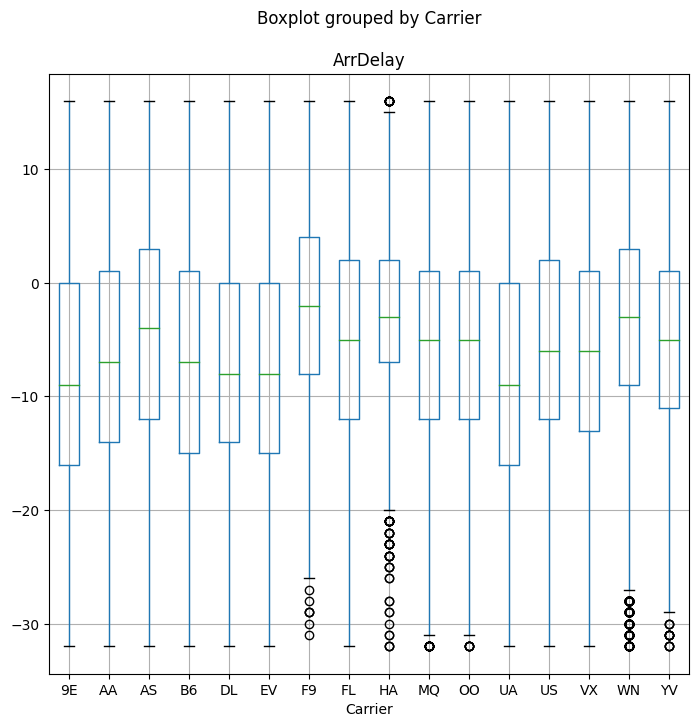

In [ ]:
flights.boxplot(column="ArrDelay",by="Carrier", figsize=(8,8))

In [ ]:
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214500.0,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000
mean,2013.0,7.027296,15.799389,3.904168,12755.329371,12734.206438,1284.230942,-0.130452,0.060182,1465.878522,-5.680522,0.032597,0.013305
std,0.0,2.006267,8.853235,1.998344,1512.139480,1506.103555,470.230018,7.260672,0.237824,487.646410,10.188473,0.177579,0.114579
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,853.000000,-5.000000,0.000000,1055.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1240.000000,-2.000000,0.000000,1448.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1658.000000,2.000000,0.000000,1850.000000,1.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,16.000000,1.000000,1.000000


In [ ]:
flights['ArrDelay'] > 0

0          True
2         False
4         False
6         False
7          True
          ...  
271932    False
271933    False
271934    False
271937     True
271938    False
Name: ArrDelay, Length: 214500, dtype: bool

 **¿Hay días de la semana más propensos a las llegadas que otros?**

 Aunque se muestra en el siguiente resultado que no existe una diferencia tan grande entre los días de la semana, el dia con mayor tiempo de retraso es el jueves y le sigue de cerca viernes y lunes.
         

In [ ]:
#print(flights["DayOfWeek"].count())
#print(flightsDayOfWeek.valuecounts())
promdepDe = flights[ flights['ArrDelay'] > 0]
dias=promdepDe.groupby('DayOfWeek')['ArrDelay'].mean()
dias = dias.sort_values(ascending=False)
print(dias)


DayOfWeek
4    7.174562
5    7.054030
1    7.009241
7    6.979090
3    6.885106
2    6.853050
6    6.726743
Name: ArrDelay, dtype: float64


 **¿Cuál es el aeropuerto de salida con mayor retraso medio?**

 El aeropuerto de salida con mayor retraso es el "Chicago Midwar International" con un promedio de 9.7 minutos de retraso.

In [ ]:
promdepDe.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)


OriginAirportName
Chicago Midway International                            9.705303
Dallas Love Field                                       8.377634
William P Hobby                                         8.373077
Baltimore/Washington International Thurgood Marshall    7.969975
Hartsfield-Jackson Atlanta International                7.792281
                                                          ...   
Ronald Reagan Washington National                       2.482933
Honolulu International                                  2.142191
Kahului Airport                                         0.588050
Long Beach Airport                                      0.480519
Ted Stevens Anchorage International                     0.468966
Name: DepDelay, Length: 70, dtype: float64

**¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?**

Si, ya que existe una correlación moderada entre ambos atributos


In [ ]:
corr_coeff= flights["DepDelay"].corr(flights["ArrDelay"])

if corr_coeff>0:
  print(corr_coeff)
  print("Si si provocan mas retraso")

else:
  print("No provoca mas retraso")


0.49214583661854694
Si si provocan mas retraso


**¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?**

La ruta (origen)San Francisco International - (llegada)Los Angeles International con un total de 228 vuelos retrasados


In [ ]:
rutas=flights.groupby(["OriginAirportName","DestAirportName"])

rutas_postiva=rutas["ArrDelay"].apply(lambda x:(x>0).sum() )

ruta_max = rutas_postiva.idxmax()

#"filtra"
ruta_max_localizado=rutas_postiva.loc[ruta_max]

total_retraso = ruta_max_localizado.sum()

print(total_retraso)
print(ruta_max)


228
('San Francisco International', 'Los Angeles International')


**¿Qué ruta tiene el mayor retraso medio de llegada?**

La ruta con mayor retraso es la de (origen)Theodore Francis Green State - (destino)Southwest Florida International

In [ ]:
grupo = flights.groupby(["OriginAirportName","DestAirportName"])["ArrDelay"].mean()
grupo_sorted = grupo.sort_values(ascending=False)

ruta_mas_retraso = grupo_sorted.index[0]
origen = ruta_mas_retraso[0]
destino = ruta_mas_retraso[1]
print(origen)
print(destino)

Theodore Francis Green State
Southwest Florida International
